In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

data processing

In [4]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
print('Number of missing values: ', retail.isnull().values.sum())
print('Percent of missing values per feature: ') 
retail.isnull().sum() * 100 / len(retail)

Number of missing values:  136534
Percent of missing values per feature: 


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
retail.dropna(inplace=True)

In [7]:
retail.reset_index(drop=True, inplace=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
print('Number of missing values: ', retail.isnull().values.sum())
print('Data lenght: ', len(retail))

Number of missing values:  0
Data lenght:  406829


In [9]:
duplicates_retail = retail.duplicated()
print(duplicates_retail.sum())

5225


In [10]:
duplicated_row1 = retail[duplicates_retail == True].iloc[0]
print(duplicated_row1)

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate            2010-12-01 11:45:00
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object


In [11]:
duplicated_row2 = retail[duplicates_retail == True].iloc[1]
print(duplicated_row2)

InvoiceNo                             536409
StockCode                              22866
Description    HAND WARMER SCOTTY DOG DESIGN
Quantity                                   1
InvoiceDate              2010-12-01 11:45:00
UnitPrice                                2.1
CustomerID                           17908.0
Country                       United Kingdom
Name: 527, dtype: object


In [12]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [13]:
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  465
Sum of value discount:  77
Sum of value postage:  1196
Sum of value cruk commission:  16
Sum of value dotcom postage:  16


In [14]:
code_less_5_filter = retail['StockCode'].str.len() < 5
code_less_5 = retail[code_less_5_filter]
count_stockcode_less_5 = code_less_5.shape[0]

print("Count of values with length less than 5 in StockCode: {}".format(count_stockcode_less_5))

Count of values with length less than 5 in StockCode: 1908


In [15]:
code_less_5.value_counts('StockCode')

StockCode
POST    1196
M        465
C2       134
D         77
CRUK      16
DOT       16
PADS       4
Name: count, dtype: int64

In [16]:
unwanted_stockcodes = ['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS']
mask = ~retail['StockCode'].isin(unwanted_stockcodes)

retail = retail[mask]

In [17]:
count_manual = (retail['Description'].eq('Manual')).sum()
count_disc = (retail['Description'].eq('Discount')).sum()
count_post = (retail['Description'].eq('POSTAGE')).sum()
count_cruk = (retail['Description'].eq('CRUK Commission')).sum()
count_dot = (retail['Description'].eq('DOTCOM POSTAGE')).sum()

print('Sum of value manual: ', count_manual)
print('Sum of value discount: ', count_disc)
print('Sum of value postage: ', count_post)
print('Sum of value cruk commission: ', count_cruk)
print('Sum of value dotcom postage: ', count_dot)

Sum of value manual:  0
Sum of value discount:  0
Sum of value postage:  0
Sum of value cruk commission:  0
Sum of value dotcom postage:  0


In [18]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

##  FSN
Fast-Moving Inventory – These SKUs sell rapidly and do not stay in stock for long periods. They are replenished frequently and typically have an inventory turnover ratio of at least 3. They generally account for less than 20% of the total inventory, reflecting high sales velocity.

Slow-Moving Inventory – These SKUs move through the supply chain more gradually and are replenished less often. Their inventory turnover ratio usually ranges between 1 and 3. This category often includes surplus stock and items with moderate sales activity, representing about 35% of the total inventory.

Non-Moving Inventory – Items in this category rarely move or may not have moved at all. They have an inventory turnover ratio below 1 and can constitute as much as 60-65% of the overall inventory. This category often includes deadstock or obsolete items that are candidates for disposal or liquidation.

In [19]:
transactions = retail.groupby('StockCode').size().reset_index(name='Frequency')
sales = retail.groupby('StockCode').agg({'Quantity':'sum', 'UnitPrice':'mean'}).reset_index()
sales['TotalSales'] = sales['Quantity'] * sales['UnitPrice']
last_purchase = retail.groupby('StockCode')['InvoiceDate'].max().reset_index()
last_purchase['RecencyDays'] = (retail['InvoiceDate'].max() - last_purchase['InvoiceDate']).dt.days

product_metrics = transactions.merge(sales, on='StockCode').merge(last_purchase[['StockCode','RecencyDays']], on='StockCode')
for col in ['Frequency', 'TotalSales', 'RecencyDays']:
    product_metrics[col + '_score'] = pd.qcut(product_metrics[col], q=3, labels=[1, 2, 3])

product_metrics['Frequency_score'] = product_metrics['Frequency_score'].astype(int)
product_metrics['TotalSales_score'] = product_metrics['TotalSales_score'].astype(int)
product_metrics['RecencyDays_score'] = product_metrics['RecencyDays_score'].astype(int)

product_metrics['TotalScore'] = (
    product_metrics['Frequency_score'] + 
    product_metrics['TotalSales_score'] + 
    product_metrics['RecencyDays_score']
)

bins = [0, 4, 6, 9]
labels = ['Non', 'Slow', 'Fast']
product_metrics['FSN_Segment'] = pd.cut(product_metrics['TotalScore'], bins=bins, labels=labels, include_lowest=True)
print(product_metrics[['StockCode', 'FSN_Segment']])

         StockCode FSN_Segment
0            10002        Fast
1            10080        Slow
2            10120        Slow
3            10125        Slow
4            10133        Fast
...            ...         ...
3672        90214V         Non
3673        90214W         Non
3674        90214Y         Non
3675        90214Z         Non
3676  BANK CHARGES         Non

[3677 rows x 2 columns]


In [20]:
fsn_mapping = product_metrics[['StockCode', 'FSN_Segment']].rename(columns={'FSN_Segment': 'FSN'})
retail = retail.merge(fsn_mapping, on='StockCode', how='left')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FSN
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Fast
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Fast
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Fast
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Fast
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Fast
...,...,...,...,...,...,...,...,...,...
404916,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Slow
404917,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Fast
404918,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Fast
404919,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Fast


C:\Users\abolf\AppData\Local\Temp\ipykernel_17104\3937659088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FSN_Segment', data=product_metrics, palette='viridis')


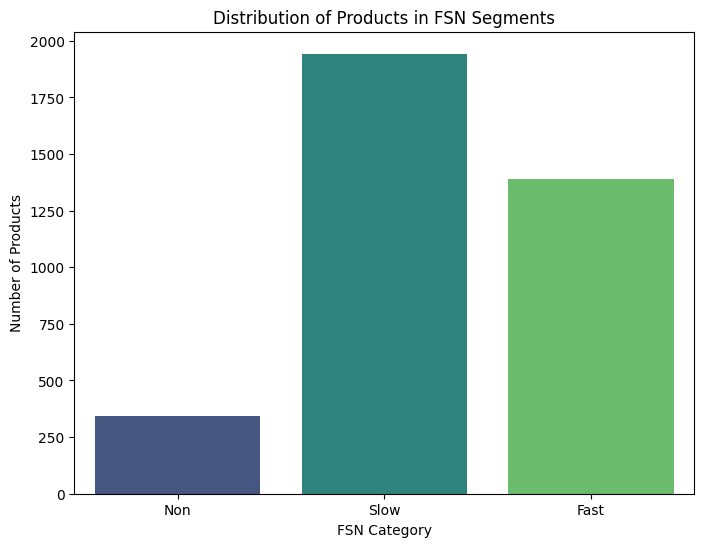

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FSN_Segment', data=product_metrics, palette='viridis')
plt.title('Distribution of Products in FSN Segments')
plt.xlabel('FSN Category')
plt.ylabel('Number of Products')
plt.show()

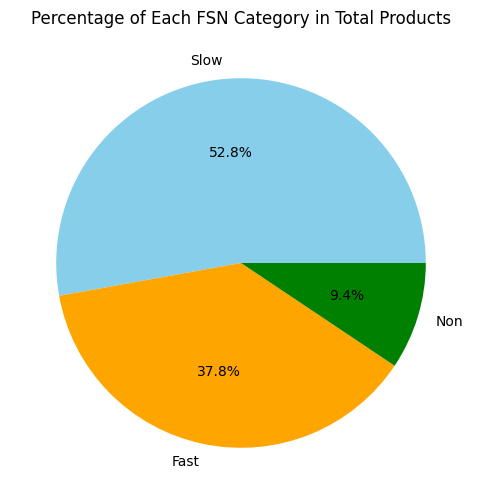

In [22]:
counts = product_metrics['FSN_Segment'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(8, 6))
percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Percentage of Each FSN Category in Total Products')
plt.ylabel('')
plt.show()